## (Binomial) Logistic Regression

In [22]:
# Reproduce results
set.seed(1234567)

### Data-Set

In [23]:
# Two possible outcomes -> binomial
data_df <- as.data.frame(iris)
idx <- data_df$Species %in% c("virginica", "versicolor")
data_df <- data_df[idx,]
y <- ifelse(data_df$Species=="virginica", 1, 0)

# For faster convergence let's rescale X
# So that we can plot this consider only 2 variables
X <- data_df[c(1,3)]
X <- as.matrix(X/max(X))

# Resulting data-set
head(X)
head(y)

,Sepal.Length,Petal.Length
51,0.8860759,0.5949367
52,0.8101266,0.5696203
53,0.8734177,0.6202532
54,0.6962025,0.5063291
55,0.8227848,0.5822785
56,0.7215190,0.5696203


[1] 0 0 0 0 0 0

### 1. Fit a binomial logit in R

  (Intercept) XSepal.Length XPetal.Length 
    -39.83851     -31.73243     105.16992 


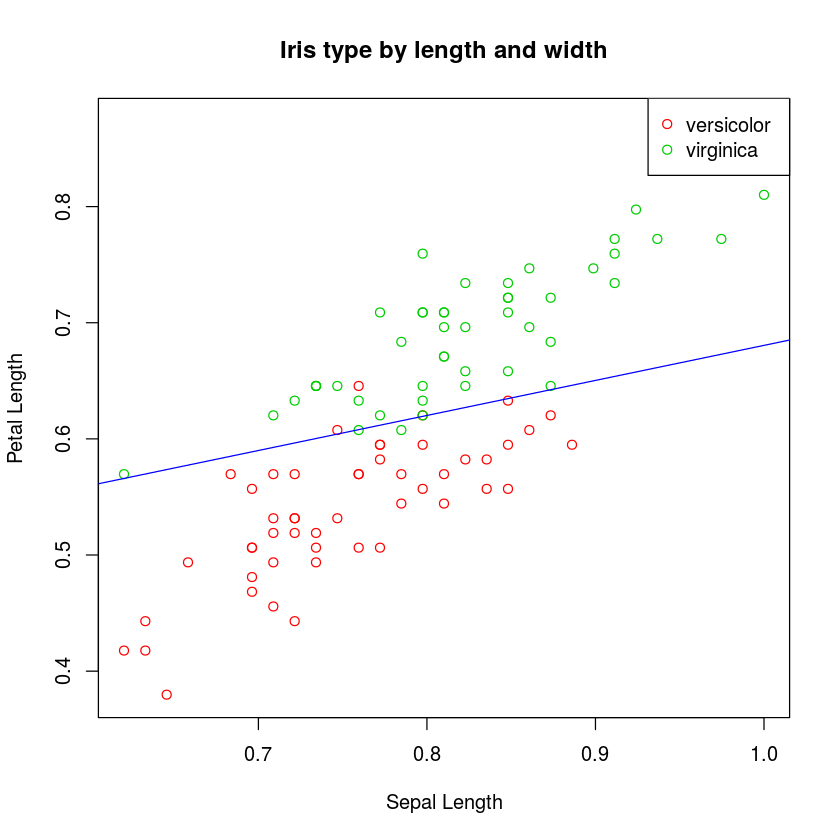

In [24]:
# Fit model
model <- glm(y ~ X, family=binomial(link='logit'))

# Params
print(coef(model))
# Coefficients:
# (Intercept) XSepal.Length XPetal.Length 
# -39.83851     -31.73243     105.16992 
#summary(model)

# Visualise the decision boundary
intcp <- coef(model)[1]/-(coef(model)[3])
slope <- coef(model)[2]/-(coef(model)[3])

# Our points
plot(x=X[,1], y=X[,2], cex = 1, col=data_df$Species,
     main = "Iris type by length and width", 
     xlab = "Sepal Length", ylab = "Petal Length")
legend(x='topright', legend=unique(data_df$Species),col=unique(data_df$Species), pch=1)
# Decision boundary
abline(intcp , slope, col='blue')

### 2. Fit a binomial logit ourself (GD)

In [25]:
# Calculate activation function (sigmoid for logit)
sigmoid <- function(z){1.0/(1.0+exp(-z))}

# Calculate log-likelihood (easier to max than likelihood)
log_likelihood <- function(X_mat, y, beta_hat)
{
  scores <- X_mat %*% beta_hat
  # Need to broadcast (y %*% scores)
  ll <- rep(y %*% scores, nrow(X_mat)) - log(1+exp(scores))
  sum(ll)
}

logistic_reg <- function(X, y, epochs, lr)
{
  X_mat <- cbind(1, X)
  beta_hat <- matrix(1, nrow=ncol(X_mat))
  for (j in 1:epochs)
  {
    residual <- sigmoid(X_mat %*% beta_hat) - y
    # Update weights with gradient
    delta <- t(X_mat) %*% as.matrix(residual, ncol=nrow(X_mat)) *  (1/nrow(X_mat))
    beta_hat <- beta_hat - (lr*delta)
  }
  # Print log-likliehood
  print(log_likelihood(X_mat, y, beta_hat))
  # Return
  beta_hat
}

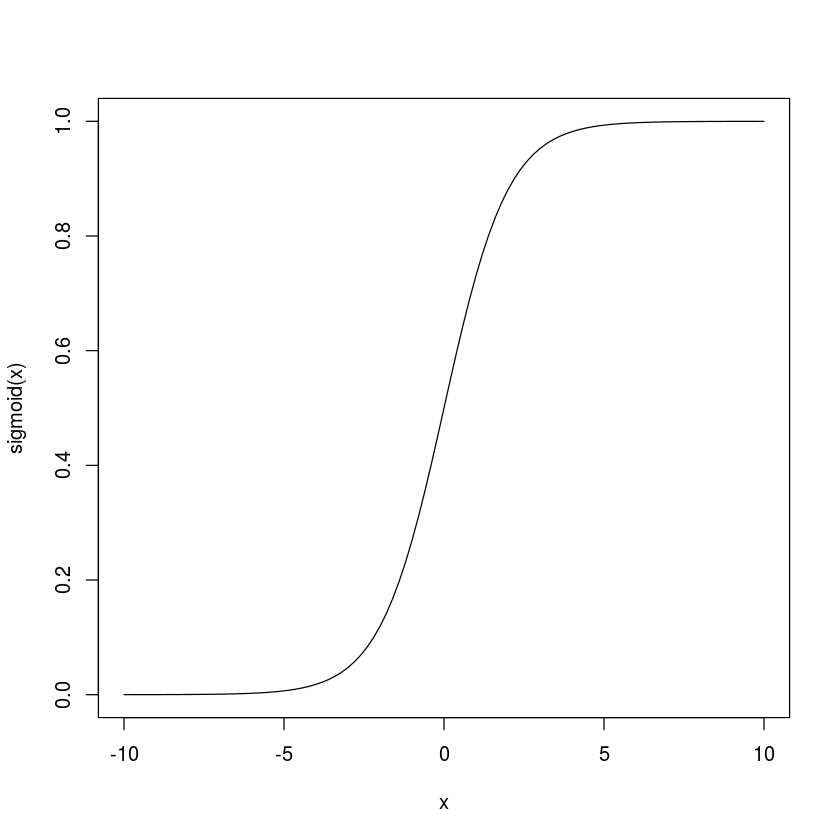

In [26]:
# Why did scaling before help with convergence?
# Vanishing gradient
curve(sigmoid, -10, 10)

[1] 37661.91
                  [,1]
             -39.83848
Sepal.Length -31.73240
Petal.Length 105.16983


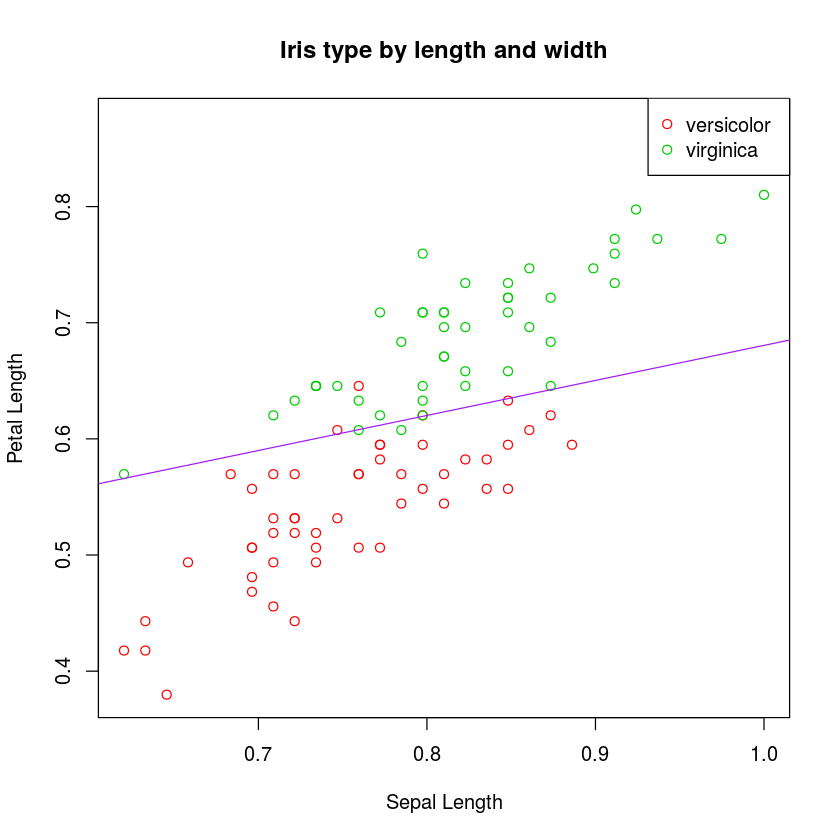

In [27]:
# Takes a while to converge with GD!
beta_hat <- logistic_reg(X, y, 300000, 5)
print(beta_hat)

# Intercept    -39.83848
# Sepal.Length -31.73240
# Petal.Length 105.16983

# Visualise the decision boundary
plot(x=X[,1], y=X[,2], cex = 1, col=data_df$Species,
     main = "Iris type by length and width", 
     xlab = "Sepal Length", ylab = "Petal Length")
legend(x='topright', legend=unique(data_df$Species),col=unique(data_df$Species), pch=1)

# Visualise the decision boundary
intcp <- beta_hat[1]/-(beta_hat[3])
slope <- beta_hat[2]/-(beta_hat[3])

abline(intcp , slope, col='purple')